# Symphony in Fourier space
[astrogr@zl](http://astrograzl.github.io/)

In [1]:
import numpy as np                                 #!  numerické metody  !#
import pandas as pd                                #$   zpracování dat   $#

In [2]:
from sklearn.preprocessing import robust_scale  #@  robustní preprocessing  @#

In [3]:
%matplotlib inline                               #*    online přístupné    *#
import seaborn as sns                            #*  vizuální statitstika  *# 
sns.set_style("darkgrid")                        #*     hustý dyzajn       *#
import matplotlib.pyplot as plt                  #* kreativní prostředí    *#
plt.rcParams["figure.figsize"] = (16, 9)         #*  vyladění parametrů    *#

In [4]:
from ipywidgets import IntProgress               #+ intenzivní prezentace  -# 
from IPython.display import display, VimeoVideo  #+   fizuální performace  -#

In [5]:
!head Fourier.E

#  This file contains fourier parameters for ASAS eclipsing binaries
#  ASAS_ID     PER[days]    a1       a2       a3        a4        b1       b2       b3       b4
000007+1844.3  2.589176  -0.05306  -0.07898  -0.03096  -0.04353  -0.00041  -0.00099  -0.00626  -0.00462
000030-3937.5  2.554119  0.04339  -0.06624  0.04029  -0.04001  -0.01007  0.01009  0.00052  -0.00473
000053-1717.5  0.297989  0.02497  -0.15342  0.00011  -0.04448  0.00997  -0.00907  0.00707  -0.00158
000058+0236.7  0.159045  -0.00716  -0.13752  0.00390  -0.02088  -0.00523  -0.01071  0.00411  0.01026
000108-3330.1  0.466579  0.00459  -0.14694  0.00557  -0.02386  -0.00898  -0.00931  -0.00007  0.00159
000112+0904.7  0.241202  0.00348  -0.03505  0.00494  -0.00673  0.00132  -0.00298  -0.00524  -0.00054
000147-5714.5  0.470344  -0.00227  -0.07159  0.00326  -0.01270  -0.00504  0.00127  0.00164  -0.00023
000202-6653.3  0.326574  0.01130  -0.16921  0.00591  -0.03646  0.00431  -0.00792  -0.00048  -0.00144


In [6]:
names = ["ASAS_ID", "PER"]
a = ["a1", "a2", "a3", "a4"]
b = ["b1", "b2", "b3", "b4"]

In [7]:
four = pd.read_table("Fourier.E", sep="\s+",
                     skiprows=2, names=names+a+b)

In [8]:
sort = four.sort_values("PER")

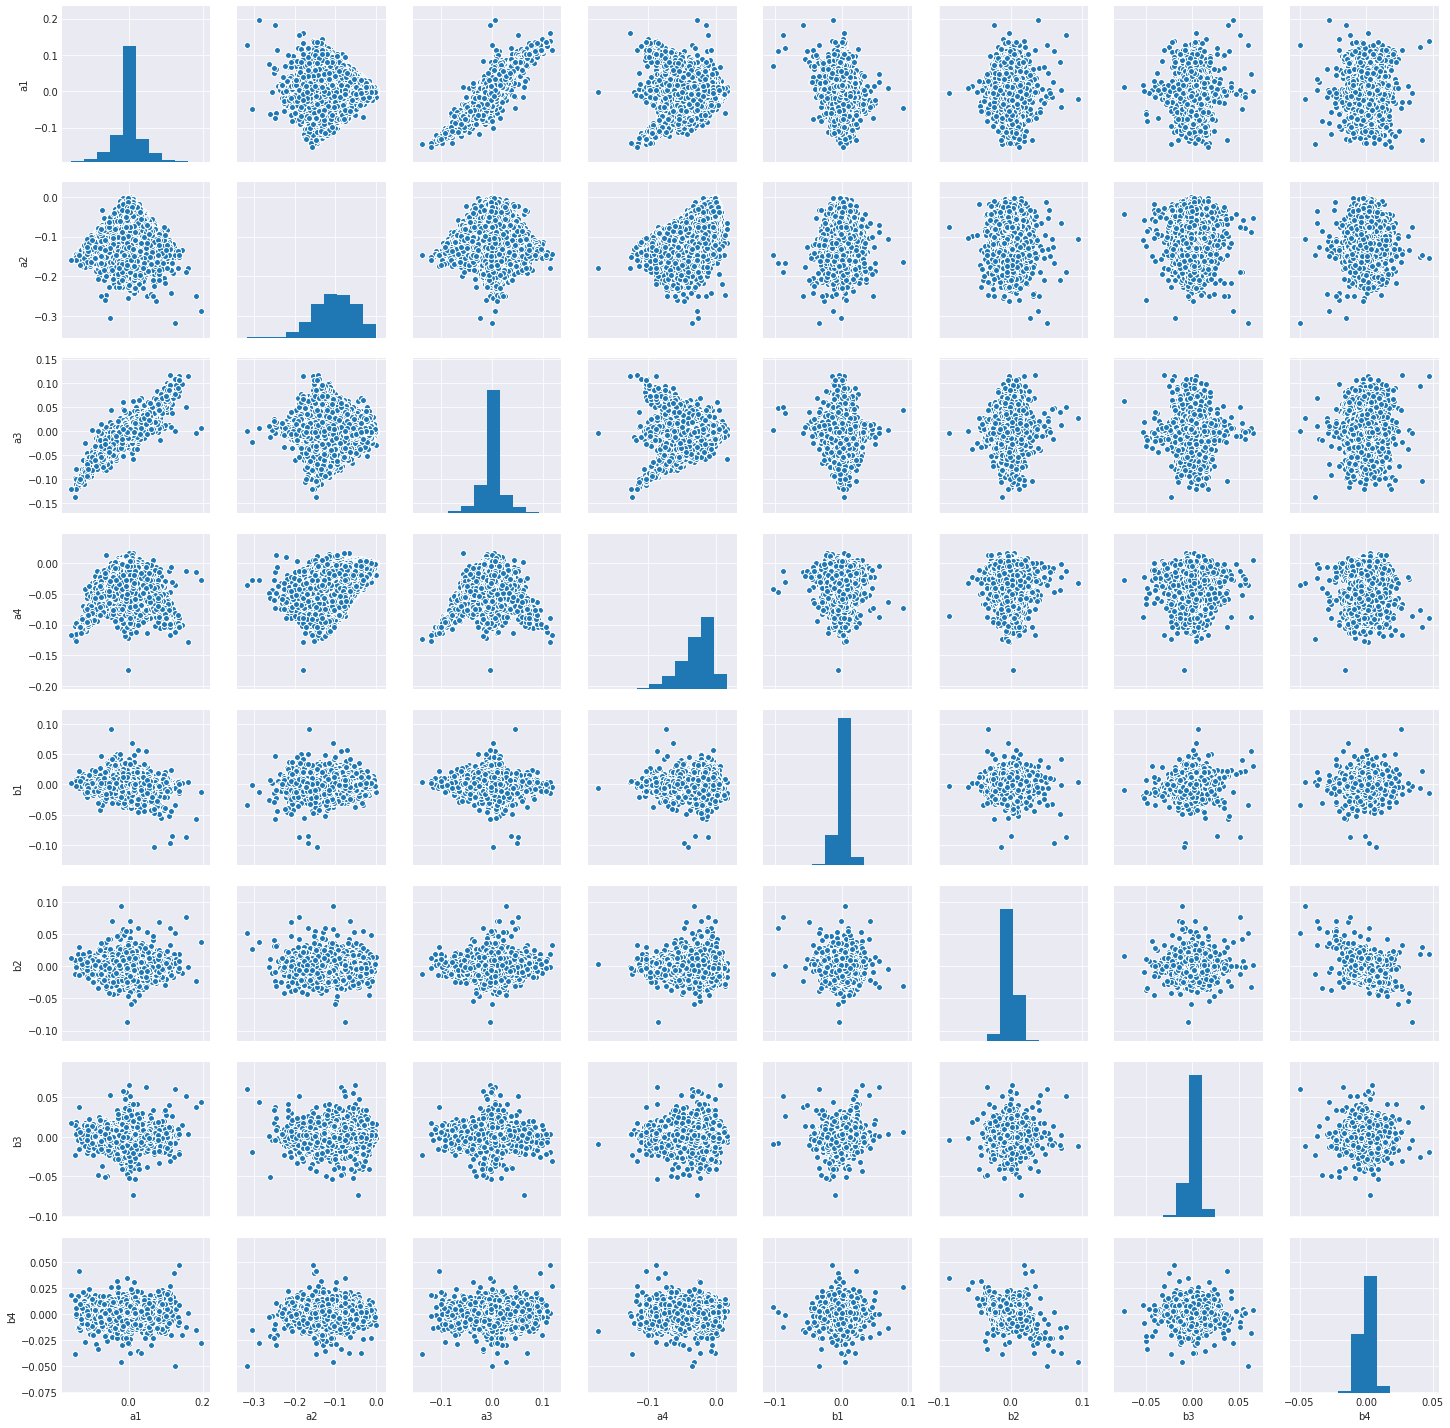

In [9]:
sns.pairplot(four[a+b]);

In [10]:
roba = pd.DataFrame(robust_scale(four[a]), columns=a)
robb = pd.DataFrame(robust_scale(four[b]), columns=b)

In [11]:
roba.shape, sort.shape, four[a].shape

((11076, 4), (11076, 10), (11076, 4))

In [12]:
def plot(i=0):
    plt.figure(num=i, figsize=(16, 8));
    plt.subplot(1, 2, 1); plt.xticks([]); plt.yticks([])
    plt.ylim([-7,7]); plt.bar(range(4), roba.iloc[i].values,
                              color="g");
    plt.subplot(1, 2, 2); plt.xticks([]); plt.yticks([])
    plt.xlim([-10,10]); plt.barh(range(4), robb.iloc[i].values,
                                 color="r");

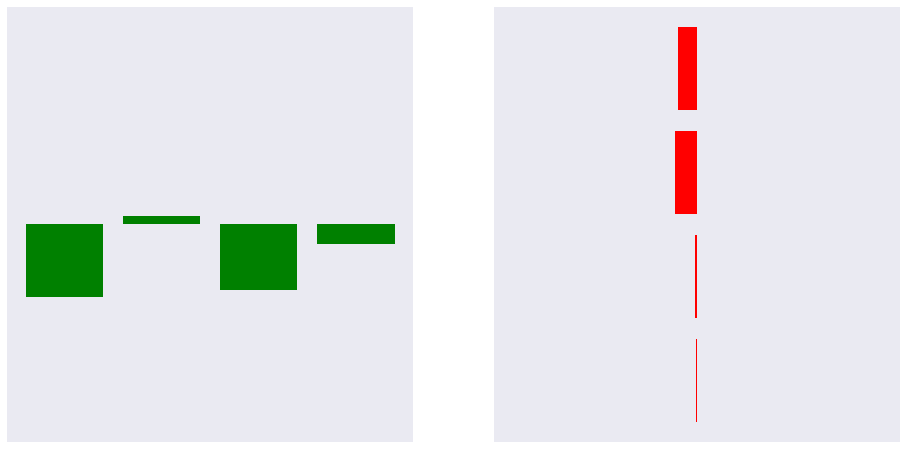

In [13]:
plot(np.random.randint(len(names)))

In [14]:
VimeoVideo(230710913, width=960, height=720)

```python
prog = IntProgress(min=0, max=len(roba))
display(prog)
for i in range(len(robb)):
    plot(i)
    plt.savefig("Fourier/per-{:07d}.png".format(i))
    plt.close(i)
    prog.value = i
```

In [13]:
#!ffmpeg -pattern_type glob -i "Fourier/*.png" -filter:v "setpts=1.35*PTS" -preset veryslow -y Fourier.mp4

ffmpeg version 3.3.3 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 7.1.1 (GCC) 20170630
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-avisynth --enable-avresample --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libass --enable-libbluray --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxvid --enable-shared --enable-version3
  libavutil      55. 58.100 / 55. 58.100
  libavcodec     57. 89.100 / 57. 89.100
  libavformat    57. 71.100 / 57. 71.100
  libavdevice    57.  6.

In [15]:
print("Done!")

Done!
